### 1. Model Evaluation and selection 

#### 1.1 Evaluation for classification
- 

In [1]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

dataset = load_digits()
X, y = dataset.data, dataset.target

for class_name, class_count in zip(dataset.target_names, np.bincount(dataset.target)):
    print(class_name, class_count)

0 178
1 182
2 177
3 183
4 181
5 182
6 181
7 179
8 174
9 180


In [2]:
y_binary_imbalanced = y.copy()
y_binary_imbalanced[y_binary_imbalanced != 1] = 0

print('Original labels:    ', y[1:30])
print('New binary labels:  ', y_binary_imbalanced[1:30])

Original labels:     [1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]
New binary labels:   [1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [3]:
np.bincount(y_binary_imbalanced)

array([1615,  182], dtype=int64)

In [4]:
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, 
                                                    random_state = 0)
svm = SVC(kernel = 'rbf', C=1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9955555555555555

In [5]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [6]:
svm.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

####  Dummy classifiers

In [7]:
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)
y_dummy_predictions = dummy_majority.predict(X_test)
y_dummy_predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [8]:
dummy_majority.score(X_test, y_test)

0.9044444444444445

- Dummy classifiers serve as a sanity check on your classifier's performance
- They provide a null metric eg null accuracy 
- Dummy classifiers should not be used for real problems
- some commonly-used settings for the strategy parameter for Dummy Classifier in scikit-learn
    - most_frequent: predicts the most frequent label in the training set
    - stratified: random predictions uniformly at random
    - uniform: generates predictions uniformly at random
    - constant: always predicts a contant label provided by the user.
- if my classifier accuracy is close to the null accuracy baseline. This could be a sign of;
    - ineffective, erroneous or missing features
    - poor choice of kernel or hyperparameter
    - large class imbalance

In [9]:
svm = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm.score(X_test, y_test)

0.9777777777777777

#### Dummy regressors
- Dummy regressors ar counterpart for dummy classifiers for regression
- strategy parameter options:
    - mean: predicts the mean of the training targets
    - median: predicts the median of the training targets
    - quantile: predicts a user-provided quantile of the training targets
    - constant: predicts a constant user-provided value.
    
### Confusion Matrices
#### binary(two-class) confusion matrix

In [10]:
from sklearn.metrics import confusion_matrix

dummy_majority = DummyClassifier(strategy = 'most_frequent').fit(X_train, y_train)

y_majority_predicted = dummy_majority.predict(X_test)
confusion = confusion_matrix(y_test, y_majority_predicted)

print('Most frequent class (dummy classifier)\n', confusion)

Most frequent class (dummy classifier)
 [[407   0]
 [ 43   0]]


In [11]:
dummy_classprop = DummyClassifier(strategy = 'stratified').fit(X_train, y_train)

y_classprop_predicted = dummy_classprop.predict(X_test)
confusion = confusion_matrix(y_test, y_classprop_predicted)

print('Random class-proportional prediction (dummy classifier)\n', 
      confusion)

Random class-proportional prediction (dummy classifier)
 [[357  50]
 [ 37   6]]


In [12]:
svm = SVC(kernel = 'linear', C=1).fit(X_train, y_train)
svm_predicted = svm.predict(X_test)
confusion = confusion_matrix(y_test, svm_predicted)

print('support vector machine classifier (liner kernel, C = 1)\n', 
      confusion)

support vector machine classifier (liner kernel, C = 1)
 [[402   5]
 [  5  38]]


In [13]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression().fit(X_train, y_train)
lr_predicted = lr.predict(X_test)
confusion = confusion_matrix(y_test, lr_predicted)

print('Logistic regression classifier (default settings)\n', 
      confusion)

Logistic regression classifier (default settings)
 [[401   6]
 [  8  35]]


C:\Users\tonny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
tree_predicted = dt.predict(X_test)
confusion = confusion_matrix(y_test, tree_predicted)

print('Decision tree classifier (max_depth = 2)\n', 
      confusion)

Decision tree classifier (max_depth = 2)
 [[400   7]
 [ 17  26]]


- in the decision tree classifier above, 
    - true negatives were 400, 
    - false negatives were 17, 
    - false positives were 7,
    - True positives were 26
- in our decision tree classifier above we can look at other evaluation metrics we can compute from these four numbers.
- a very simple related number that we can sometimes use is **classification error**
- **classification error** is the sum of counts off the diagonal namely all of the errors divided by total instance count, numerically, this is equivalent to one minus the accuracy.
    - *i.e (7+17)/(400+17+7+26) = 0.95*
- **True positive rate(TPR)** is the fraction of all positive instances does the classifier correctly identify as positive
    - *i.e (26)/(26+17) = 0.60*
- **Precision**: what the fraction of positive predictions are correct
    - *i.e (26)/(26+7) = 0.79*
- **False positive rate**: what fraction of all negative instances does the claassifier incorrectly identify as positive. It is also known as specificity
    - *i.e (7)/(400+7) = 0.02*
- we can see that a recall of 0.68 means that about 68% of the points in the positive prediction region to the left of the decision boundary are correctly classified as positive.
- A recall of 0.87 means that of all true positive istances, the positive prediction region has found about 87% of them.
- if we wanted a classifier that was oriented towards higher levels of precision like in the search engine query suggestion task, we might want a decision boundary instead that looks like

- now all the points in the positive prediction region seven out of seven are true positives, giving us a perfect precision of 1.0,
- now this comes at a cost because out of the 15 total positive instances eight of them are now false negatives, in other words, they are incorrectly predicted as being negative and so recall drops to 7 divided by 15 or 0.47.
- on the other hand, if our classification task is like the tumor detection example, we want to minimize false negatives and obtain high recall. in which case we would want the classifier's decision boundary to look like this

- now all 15 positive instances have been correctly predicted as being in the positive class, which means these tumors have all been detected.
-However, it also comes with a cost since the number of false positives, things that the detector triggers as possible tumors for example that are actually not, has gone up. so, recall is a perfect 1.0 score but the precision has dropped to 15 out of 42 or 0.36
- these examples illustrate a classic trade-off that often appears in machine learning applications. Namely, 
    - that you can often increase the precision of a classifier but the downside is that you may reduce recall or,
    - you could increase the recall of a classifier at the cost of reducing precision.
- recall oriented machine learning tasks include medical and legal applications where the cosequences of not correctly identifying a positive example can be high.
- often in these scenarios human experts are deployed to help filter out false positives that almost inevitably increase with high recall applications.
- Many customer facing machine learning models are precision oriented since here the cosequences of false positives can be high, for example, hurting a customer's experience on a website by providing incorrect or unhelpful information. examples include search engine ranking and classifying documents to annotate them with topic tags

#### F1-score
- when evaluating classifiers, its often convinient to compute a quantity known as an F1 score that combines precision and recall into a single number.
- mathematically this is based on the harmonic mean of precision and recall using the formula;
    - *2 * (precision X recall)  /  (precision + recall)*
- The F1 score is a special case of a more general evaluation metric known as an F score that introduces a parameter beta.
- by adjusting beta we can control how much emphasis an evaluation is given to precision versus recall.
    - if we have precision oriented users, we might say a beta equal to 0.5, since we want false positives to hurt performane more than false negatives.
    - for recall oriented situations, we might set beta to a number larger than one, say two, to emphasize that false negatives should hurt perfomance more than false positives


#### Evaluation metrics for binary classification

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, tree_predicted):.2f}')
print(f'Precision: {precision_score(y_test, tree_predicted):.2f}')
print(f'Recall: {recall_score(y_test, tree_predicted):.2f}')
print(f'F1: {f1_score(y_test, tree_predicted):.2f}')

Accuracy: 0.95
Precision: 0.79
Recall: 0.60
F1: 0.68


In [16]:
from sklearn.metrics import classification_report

print(classification_report(y_test, tree_predicted, target_names = ('not 1', '1')))

              precision    recall  f1-score   support

       not 1       0.96      0.98      0.97       407
           1       0.79      0.60      0.68        43

    accuracy                           0.95       450
   macro avg       0.87      0.79      0.83       450
weighted avg       0.94      0.95      0.94       450



In [17]:
print('Random class-proportional (dummy)\n', 
      classification_report(y_test, y_classprop_predicted, target_names=['not 1', '1']))
print('SVM\n', 
      classification_report(y_test, svm_predicted, target_names = ['not 1', '1']))
print('Logistic regression\n', 
      classification_report(y_test, lr_predicted, target_names = ['not 1', '1']))
print('Decision tree\n', 
      classification_report(y_test, tree_predicted, target_names = ['not 1', '1']))

Random class-proportional (dummy)
               precision    recall  f1-score   support

       not 1       0.91      0.88      0.89       407
           1       0.11      0.14      0.12        43

    accuracy                           0.81       450
   macro avg       0.51      0.51      0.51       450
weighted avg       0.83      0.81      0.82       450

SVM
               precision    recall  f1-score   support

       not 1       0.99      0.99      0.99       407
           1       0.88      0.88      0.88        43

    accuracy                           0.98       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.98      0.98      0.98       450

Logistic regression
               precision    recall  f1-score   support

       not 1       0.98      0.99      0.98       407
           1       0.85      0.81      0.83        43

    accuracy                           0.97       450
   macro avg       0.92      0.90      0.91       450
weighted avg 

#### Classifier Decision Funtions
- each classifier score value per test point indicates how confidently the classifier predicts the positive class(large-magnitude positive values) or the negative class (large-magnitude negative values)
- choosing a fixed decision threshold gives a classification rule.
- by sweeping the decision threshold through the entire range of possible score values, we get a series of classification outcomes that form a curve

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_scores_lr = lr.fit(X_train, y_train).decision_function(X_test)
y_score_list = list(zip(y_test[0:20], y_scores_lr[0:20]))

# show the decision_function scores for first 20 instances
y_score_list

C:\Users\tonny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, -29.828772009991667),
 (0, -19.382801050061957),
 (0, -29.198642696254918),
 (0, -21.746386043966467),
 (0, -22.642356868158288),
 (0, -11.805856133622399),
 (1, 6.4959992614899065),
 (0, -23.354667312206328),
 (0, -27.544163114762792),
 (0, -26.888205434887926),
 (0, -31.863221446983143),
 (0, -22.486035793478106),
 (0, -25.318055296874483),
 (0, -13.384477072076102),
 (0, -13.565675488053238),
 (0, -13.308303778707845),
 (1, 12.181083900744412),
 (0, -34.36237264138141),
 (0, -13.231580938636178),
 (0, -29.594027196661564)]

#### predicted probability of class membership (predict_proba)
- likewise, the predited proba function provides predicted probabilities of class membership.
- typically a classifier which use the more likely class, thats in a binary classifier, you find the class with probability greater than 50%.
- adjusting the decision threshold i.e probability greater than 70% affects the prediction of the classifier.
- a higher threshold means that a classifier has to be more confident in predicting the class. for example, we might predict class one only if the estimated probability of class one was over 70% and this results in a more conservative classifier.
- this increase precision doesnt predict class 1 as often but when it does, it gets high proportion of lass 1 instances correct.
- not all odels provide realistic probability estimates

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)
y_proba_lr = lr.fit(X_train, y_train).predict_proba(X_test)
y_proba_list = list(zip(y_test[0:20], y_proba_lr[0:20,1]))

# show the probability of positive class for first 20 instances
y_proba_list

C:\Users\tonny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[(0, 1.1105264686148249e-13),
 (0, 3.820818944672015e-09),
 (0, 2.0854059002182867e-13),
 (0, 3.594715626765122e-10),
 (0, 1.4674028384498448e-10),
 (0, 7.4606829899019575e-06),
 (1, 0.9984928089457435),
 (0, 7.197751680476795e-11),
 (0, 1.0907417846580064e-12),
 (0, 2.101845316534823e-12),
 (0, 1.4520405673135273e-14),
 (0, 1.7156896641113812e-10),
 (0, 1.010434792708349e-11),
 (0, 1.5388447107086222e-06),
 (0, 1.2838120115491663e-06),
 (0, 1.6606434016199439e-06),
 (1, 0.9999948735083789),
 (0, 1.1929196069321548e-15),
 (0, 1.7930674747929662e-06),
 (0, 1.4043562493363103e-13)]

- you can see that many entries with a positive label of one have a high probability like 0.995 while many egative label instances have a very low prediction probability.
-note that not all models provide useful probability estimates of this type. for example, a model that was over-fit to a training set might provide overly optimistic high probabilities that were infact not accurate.
- now we can use these decision scores or prediction probabilities for getting more complete evaluation picture of a classifiers performance. 
- for a particular application we might pick a specific decision threshold depending on whether we want the classifier to be more or less conservative about making false-positives or false-negative errors
- it might not be entirely clear when developing a new model, what the right decision threshold would be, and how that choice will affect evaluation metrics like precision and recall.
- so instead, what we will do is look at how classifier performs for all possible decision threshold.
![Title](Screenshot_138.png)

#### Precision-Recall and ROC curves
- precision-recall curves are widely used evaluation method from machine learning.
- as we saw in the previous example, the x-axis shows precision and the y-axis shows recall.
- an ideal classifier would be able to achieve perfect precision of 1.0 and perfect recall of 1.0. so the optimal point would be up in the top right corner.
-in general, with precision-recall curves, the closer in some sense the curve is to the top right corner, the more prefferable it is , the more beneficial the tradeoff it gives between precision and recall.
#### ROC curves
- ROC curves or reciever operating characteristic curves are a very widely used visualization method that illustrates the performance of a binary classifier.
- ROC curves on the X-axis show a classifier's False Positive Rate so that would go from 0 to 1,
- on the y-axis they show a classifiers true positive rate so that will also go from 0 to 1.0
- the ideal point in ROC space is one where the classifier achieves zero, a false positive rate of zero and a true positive rate of one. so that would be the upper left corner.
- So curves in ROC space represent different tradeoffs as the decision boundary, the decision threshold is varied for the classifier. So just as in the precision recall case, as we vary decision threshold, we'll get different numbers of false positives and true positives that we can plot on a chart.
- The dotted line here that I'm showing is the classifier curve that secretly results from a classifier that randomly guesses the label for a binary class.
-It's basically like flipping a coin. If you have two classes with equal numbers of positive and negative incidences, then
- flipping a coin will get you randomly equal numbers of false positives and true positives for a large virus data sets. So the dotted line here is used as a base line. So bad classifier will have performance that is random or maybe even worse than random or be slightly better than random. Reasonably good classifier will give an ROC curve that is consistently better than random across all decision threshold choices.
- And then an excellent classifier would be one like I've shown here, which is way up into the left.
- This particular example is an example of a logistic regression classifier using the notebook example you've seen.
![Title](Screenshot_140.png)
- So, the shape of the curve can be important as well, the steepness of the curve, we want classifiers that maximize the true positive rate while minimizing the false positive rate.
- Now as we'll see next, we can qualify the goodness of a classifier in some sense by looking at how much area there is underneath the curve.
- So the area underneath the random classifier is going to be 0.5 but then the area, as you can see, the size of the bumpiness of the classifier as it approaches the top left corner. Well, the area underneath the curve will get larger and larger. It will approach 1. And so, as we'll see in the next slide.
- We use something called area under the curve, AUC. That's the single number that measures this total area underneath the ROC curve as a way to summarize a classifier's performance. So, an AUC of zero represents a very bad classifier, and an AUC of one will represent an optimal classifier.

<IPython.core.display.Javascript object>


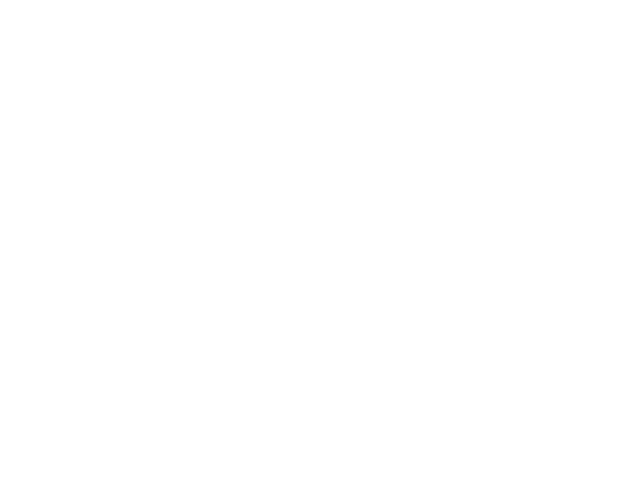

In [20]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_lr)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure()
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.01])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.show()

#### ROC curves, Area under curve (AUC)

C:\Users\tonny\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<IPython.core.display.Javascript object>


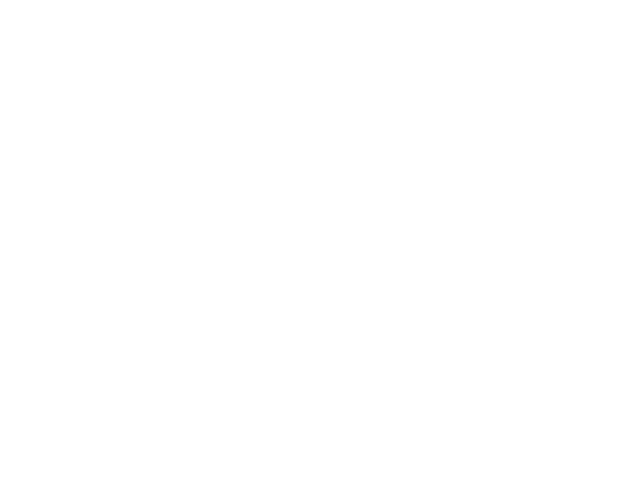

In [21]:
from sklearn.metrics import roc_curve, auc

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

y_score_lr = lr.fit(X_train, y_train).decision_function(X_test)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_score_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_lr, tpr_lr, lw=3, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
plt.show()

<IPython.core.display.Javascript object>


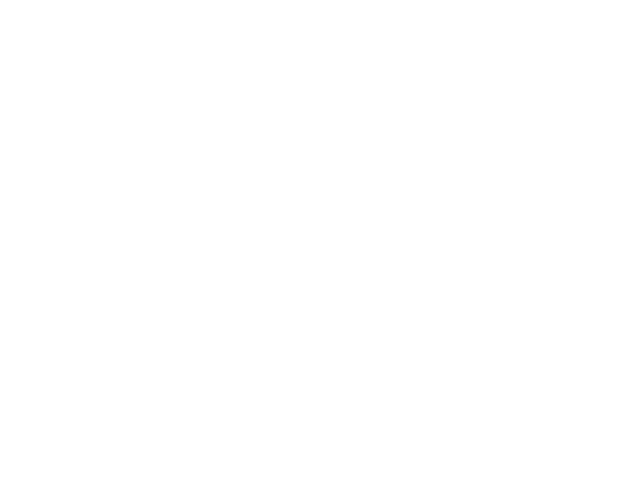

gamma = 0.01  accuracy = 0.91   AUC = 1.00
gamma = 0.10  accuracy = 0.90   AUC = 0.98
gamma = 0.20  accuracy = 0.90   AUC = 0.66
gamma = 1.00  accuracy = 0.90   AUC = 0.50


In [22]:
from matplotlib import cm

X_train, X_test, y_train, y_test = train_test_split(X, y_binary_imbalanced, random_state=0)

plt.figure()
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
for g in [0.01, 0.1, 0.20, 1]:
    svm = SVC(gamma=g).fit(X_train, y_train)
    y_score_svm = svm.decision_function(X_test)
    fpr_svm, tpr_svm, _ = roc_curve(y_test, y_score_svm)
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    accuracy_svm = svm.score(X_test, y_test)
    print("gamma = {:.2f}  accuracy = {:.2f}   AUC = {:.2f}".format(g, accuracy_svm, 
                                                                    roc_auc_svm))
    plt.plot(fpr_svm, tpr_svm, lw=3, alpha=0.7, 
             label='SVM (gamma = {:0.2f}, area = {:0.2f})'.format(g, roc_auc_svm))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate (Recall)', fontsize=16)
plt.plot([0, 1], [0, 1], color='k', lw=0.5, linestyle='--')
plt.legend(loc="lower right", fontsize=11)
plt.title('ROC curve: (1-of-10 digits classifier)', fontsize=16)
plt.show()

#### Evaluation measures for Multi-Class Classification
- in many respects, multi-class evaluation is a straightforward extension of the methods we use in binary evaluation.
- instead of two classes, we have multiple classes, so the results of multi-class evaluation amount to a collection of true verses predicted binary outcome per class.

<IPython.core.display.Javascript object>


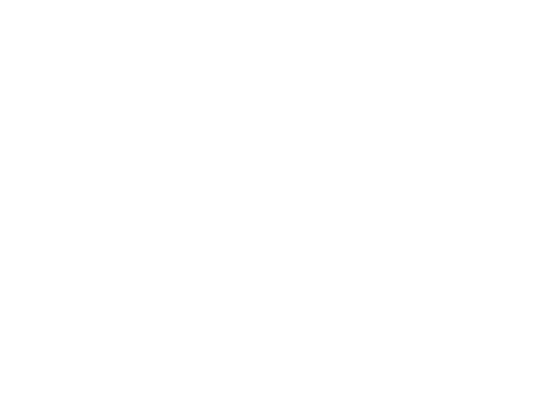

<IPython.core.display.Javascript object>


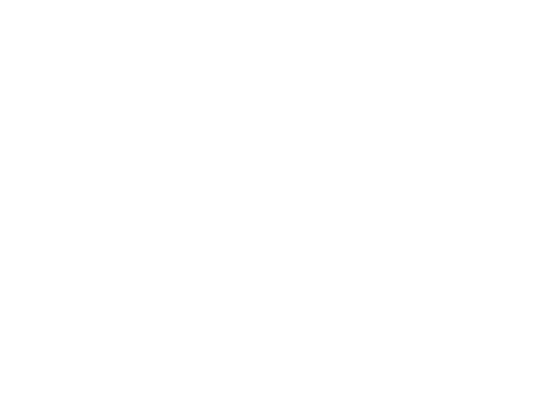

In [23]:
dataset = load_digits()
X, y = dataset.data, dataset.target
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(X, y, random_state=0)


svm = SVC(kernel = 'linear').fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, 
                     index = [i for i in range(0,10)], columns = [i for i in range(0,10)])

plt.figure(figsize=(5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                       svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label')


svm = SVC(kernel = 'rbf', C = 3, degree = 3, gamma = 0.016).fit(X_train_mc, y_train_mc)
svm_predicted_mc = svm.predict(X_test_mc)
confusion_mc = confusion_matrix(y_test_mc, svm_predicted_mc)
df_cm = pd.DataFrame(confusion_mc, index = [i for i in range(0,10)],
                  columns = [i for i in range(0,10)])

plt.figure(figsize = (5.5,4))
sns.heatmap(df_cm, annot=True)
plt.title('SVM RBF Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(y_test_mc, 
                                                                    svm_predicted_mc)))
plt.ylabel('True label')
plt.xlabel('Predicted label');

#### Multi-class classification report
- just as in the binary case, you can get a classifiction report that summarizes multiple evaluation metrics for a multi-class classifier with an average metric computed for each class 

In [24]:
print(classification_report(y_test_mc, svm_predicted_mc))

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        37
           1       1.00      0.28      0.44        43
           2       1.00      0.41      0.58        44
           3       1.00      0.89      0.94        45
           4       0.14      1.00      0.25        38
           5       1.00      0.33      0.50        48
           6       1.00      0.56      0.72        52
           7       1.00      0.38      0.55        48
           8       1.00      0.06      0.12        48
           9       1.00      0.57      0.73        47

    accuracy                           0.50       450
   macro avg       0.91      0.51      0.56       450
weighted avg       0.93      0.50      0.56       450



#### Macro-Average and Micro-average

- if the class have about the same number of instances, micro- and macro-average will be about the same.
##### macro-average
![Title](macroaverage.png)
##### micro-average
![Title](microaverage.png)
- if some classes are much larger or have more instances than others and you want to;
    - weight your metric towards the largest ones, use micro-aeraging
    - weight your metric towards the smallest ones, use macro-averaging. 
- if the micro-average is much lower than the macro-average then examine the larger class for poor metric performance
- if the macro-average is much lower than the micro-average then examine the smaller classes for poor metric performance

In [25]:
micro_average = precision_score(y_test_mc, svm_predicted_mc, average = 'micro')
print(f'Micro-averaged precision =  {micro_average:.2f} (treat instances equally)')
print(f'Macro-averaged precision =  {precision_score(y_test_mc, svm_predicted_mc, average = "macro"):.2f} (treat classes equally)')

Micro-averaged precision =  0.50 (treat instances equally)
Macro-averaged precision =  0.91 (treat classes equally)


In [26]:
print(f'Micro-averaged f1 = {f1_score(y_test_mc, svm_predicted_mc, average = "micro"):.2f} (treat instances equally)')
print(f'Macro-averaged f1 = {f1_score(y_test_mc, svm_predicted_mc, average = "macro"):.2f} (treat classes equally)')

Micro-averaged f1 = 0.50 (treat instances equally)
Macro-averaged f1 = 0.56 (treat classes equally)


#### Regression evaluation
- in practice it turns out that for most applications of regression, distinguishing between these types of different errors (precision and recall) is not as important
- in most cases, the r-squared score thats available for regression in scikit-learn and that summarizes how well future instances will be predicted is adequate for most tasks.
- as a reminder, the r-squared score for a perfect predictor is 1.0 and for a predictor that always outputs the same constant value, the r-squared score is 0.0.
- The r-squared score despite the squared in the name that suggests its always positive does have the potential for bad model fits, such as when fitting non-linear functions to data.
- there are a few alternative regression devaluation metrics you should be aware of that work differently than the r-squared score.
- **Mean absolute error** takes the mean absolute difference between the target and predicted values.
- in machine learning terms this corresponds to the expected value of L1 norm laws.
- this is sometimes used for example to asses focused outcomes for regression in time series analysis.
- **Mean squared error** takes the mean squared difference between the target and predicted values and this corresponds to the expected value of the L2 norm loss.
- This is widely used for many regression problems and larger errors have correspondingly larger squared contributions to the mean error
- like mean absolute error, mean squared error does not distinguish between over and under estimates
- finally, one situation that arrises quite often is the existence of outliers in the data, which can have unwanted influence on the overall r-squared value. 
- in those casses, when ignoring outliers is important, you can use the **median_absolute_error*** score, which is robust with the presence of outliers because it uses the median of the error distribution rather than the mean.

#### Dummy regressors
- we saw how using dummy classifiers could give us simple but useful baselines to compare aganist when evaluating a classifier. The same exists for regression
- There is a dummy regressor class that provides prediction using simple strategies that do not look at the input data.


In [27]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor

diabetes = datasets.load_diabetes()

X = diabetes.data[:, None, 6]
y = diabetes.target

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

lm = LinearRegression().fit(X_train, y_train)
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)

y_predict = lm.predict(X_test)
y_predict_dummy_mean = lm_dummy_mean.predict(X_test)

print('Linear model, coefficients: ', lm.coef_)
print("Mean squared error (dummy): {:.2f}".format(mean_squared_error(y_test, 
                                                                     y_predict_dummy_mean)))
print("Mean squared error (linear model): {:.2f}".format(mean_squared_error(y_test, y_predict)))
print("r2_score (dummy): {:.2f}".format(r2_score(y_test, y_predict_dummy_mean)))
print("r2_score (linear model): {:.2f}".format(r2_score(y_test, y_predict)))

# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_predict, color='green', linewidth=2)
plt.plot(X_test, y_predict_dummy_mean, color='red', linestyle = 'dashed', 
         linewidth=2, label = 'dummy')

plt.show()

Linear model, coefficients:  [-698.80206267]
Mean squared error (dummy): 4965.13
Mean squared error (linear model): 4646.74
r2_score (dummy): -0.00
r2_score (linear model): 0.06


<IPython.core.display.Javascript object>

- the points are the data instances from the test split and form a cloud that looks like it may trend down slightly to the right.
- the green line, which is also labelled fitted model is the default linear regression that was fit to the training points. we see that its not particularly strong fit to the test data.
- The red line labelled dummy mean shows a linear model that uses the strategy of always predicting the mean of the training data - an example of a dummy regressor
- a dummy regressor is created and used just like a regular regression model.
- you create, fit with the training data and then call predict on the test data.
- altough, again like the dummy classifier you should not use the dummy regressor for actual problems. its only used to provide a baseline for comparison.
- looking at the regression metrics output from the linear model compared to the dummy model, we can see that as expected the dummy regressor achieves an r-squared score of 0 since it always makes a constant prediction without looking at the output.
- in this instance the linear model provides only slightly better fit than the dummy regressor according to both mean squared error and the r-squared score.
- aside fro this strategy of always predicting the mean of the training values, you could also create some other flavours of dummy regressors that always predict the median of the training target values or a particular quantile of those values or a specific custom constant value that you provide
- although regression typically has simpler evaluation needs than classification, it does pay to double check to make sure the evaluation metric you choose for a regression problem does penalize errors in a way that reflects the cosequences of those errors for the business, organizational or user needs of your application 

#### Model selection: Optimizing Classifiers for different evaluation metrics
##### Cross-validation example
- scikit-learn makes it very easy for you to apply the new scoring metrics you hav already larnt
- you simply add a scoring parameter that is set to the string with the name of the evaluation metric you want to use.
- we will use a cross-validation example where we're running five folds using a support vector classifier with a linear kernel and C parameter set to one.
- the first call to cross_val_score just uses the default accuracy  as the evaluation metric.
- the second call uses the scoring parameter using the string 'roc_auc' and this will use AUC as the ealuation metric
- the third call uses 'recall' as the evaluation metric.
- the results are a list of five evaluation values, one per fold for each metric.
- here we're not doing any parameter tuning we're simply evaluating our model's average performance across multiple folds.


In [29]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

dataset = load_digits()

X,y = dataset.data, dataset.target == 1
clf = SVC(kernel = 'linear', C=1)

print(f'Cross-validation (accuracy) = {cross_val_score(clf, X, y, cv = 5)}')
print(f'Cross-validation (AUC) = {cross_val_score(clf, X, y, cv = 5, scoring = "roc_auc" )}')
print(f'cross-validation (recall) = {cross_val_score(clf, X, y, cv = 5, scoring = "recall")}')

Cross-validation (accuracy) = [0.91944444 0.98611111 0.97214485 0.97493036 0.96935933]
Cross-validation (AUC) = [0.9641871  0.9976571  0.99372205 0.99699002 0.98675611]
cross-validation (recall) = [0.81081081 0.89189189 0.83333333 0.83333333 0.83333333]


##### Grid search example
- in this grid search example we use a support vector classifier that uses a radial basis function kernel and the critical parameter here is the gamma parameter that intuitively sets the radius or width of influence of the kernel.
- we use GridSearchCV to find the value of gamma that optimizes a given evaluation metric in two cases.
- in the first case we just optimize for average accuracy.
- in the second case we just optimize for AUC.
- in this particular case the optimal value of gamma happens to be the same, 0.001
- as we will see later in other casses, the optimal parameter value can be quite different depending on the evaluation metric used to optimize.

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

dataset = load_digits()

X, y =  dataset.data, dataset.target == 1
X_train, X_test, y_train, y_test =  train_test_split(X, y, random_state = 0)

clf = SVC(kernel = 'rbf')
grid_values = {'gamma': [0.001, 0.01, 0.05, 0.1, 1, 10, 100]}

grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)
y_decision_fn_scores_acc = grid_clf_acc.decision_function(X_test)

print(f'Grid best parameter (max. accuracy): {grid_clf_acc.best_params_}')
print(f'Grid best score (accuracy): {grid_clf_acc.best_score_}')

grid_clf_auc = GridSearchCV(clf, param_grid = grid_values, scoring = 'roc_auc')
grid_clf_auc.fit(X_train, y_train)
y_decision_fn_scores_auc = grid_clf_auc.decision_function(X_test)

print(f'Test set AUC: {roc_auc_score(y_test, y_decision_fn_scores_auc)}')
print(f'Grid best parameter (max. AUC): {grid_clf_auc.best_params_}')
print(f'Grid best score (AUC): {grid_clf_auc.best_score_}')

Grid best parameter (max. accuracy): {'gamma': 0.001}
Grid best score (accuracy): 0.9985157648354676
Test set AUC: 0.99982858122393
Grid best parameter (max. AUC): {'gamma': 0.001}
Grid best score (AUC): 1.0


- you can see the complete list of names for the evaluation metric supported by the scoring parameter by running the code below that uses th scores variable imported from sklearn.metrics
- you can see metrics for classification such as the string 'precision_micro' that represents micro-averaged precision as well as metrics for regression such as r-squared.


In [34]:
from sklearn.metrics.scorer import SCORERS
sorted(list(SCORERS.keys()))

C:\Users\tonny\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

- Let's take a look at a specific example that shows how a classifier's decision boundary changes when it's optimized for different evaluation metrics.
- This classification problem is based on the same binary digit classifier training and test sets we've been using as an example throughout the notebook. 
- In these classification visualization examples, the positive examples, the digit one are shown as black points and the region of positive class prediction is shown in the light-colored or yellow region to the right of this decision boundary. 
- The negative examples, all other digits, are shown as white points. And the region of negative class prediction here in these figures is to the left of the decision boundary. 
- The data points have been plotted using two out of the 64 future values in the digits' dataset and have been jittered a little. That is, I've added a little bit of random noise so we can see more easily the density of examples in the feature space